In [1]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from tqdm import tqdm

In [2]:
w = 2.6617e-6
G = 6.67e-11
mT = 5.9736e24
rT = 6.3781e6
mL = 0.07349e24
rL = 1.7374e6
d = 3.844e8

dTL = rT + rL + d

In [3]:
def System(v,t):
    
    r,phi,pr,pphi = v

    delta = G*mT/d**3

    rp = np.sqrt(1+r**2-2*r*np.cos(phi-w*t))

    mu = mL/mT
    
    rdot = pr
    phidot = pphi/(r**2)
    prdot = pphi**2/(r**3) - delta*(1/r**2+mu/(rp**3)*(r-np.cos(phi-w*t)))
    pphidot = -delta*mu*(r*np.sin(phi-w*t))/(rp**3)
    
    return np.array([rdot,phidot,prdot,pphidot])

In [4]:
def rungekutta4_system(t, r0, f):
    
    h = t[1] - t[0]
    
    r = np.zeros_like(t)
    phi = np.zeros_like(t)
    pr = np.zeros_like(t)
    pphi = np.zeros_like(t)
    phil = np.zeros_like(t)

    r[0] = r0[0]
    phi[0] = r0[1]
    pr[0] = r0[2]
    pphi[0] = r0[3]

    phil[0] = 0
    
    for i in range(1,len(t)):
        
        state1 = np.array([r[i-1], phi[i-1], pr[i-1], pphi[i-1]])
        k1 = f(state1, t[i-1])


        state2 = np.array([r[i-1]+0.5*h*k1[0], phi[i-1]+0.5*h*k1[1], pr[i-1]+0.5*h*k1[2], pphi[i-1]+0.5*h*k1[3]])
        k2 = f(state2, t[i-1]+0.5*h)

        state3 = np.array([r[i-1]+0.5*h*k2[0], phi[i-1]+0.5*k2[1], pr[i-1]+0.5*k2[2], pphi[i-1]+0.5*k2[3]])
        k3 = f(state3, t[i-1]+0.5*h)


        state4 = np.array([r[i-1]+h*k3[0], phi[i-1]+h*k3[1], pr[i-1]+h*k3[2], pphi[i-1]+h*k3[3]])
        k4 = f(state4, t[i-1]+h)

        
        r[i] = r[i-1] + (h/6)*(k1[0]+2*k2[0]+2*k3[0]+k4[0])
        phi[i] = phi[i-1] + (h/6)*(k1[1]+2*k2[1]+2*k3[1]+k4[1])
        pr[i] = pr[i-1] + (h/6)*(k1[2]+2*k2[2]+2*k3[2]+k4[2])
        pphi[i] = pphi[i-1] + (h/6)*(k1[3]+2*k2[3]+2*k3[3]+k4[3])
        


        phil[i] = phil[i-1] + w*h
        
        
    return r, phi, pr, pphi, phil

In [5]:
dt = 1.
tmax = 6e5
t = np.arange(0,tmax,dt)

In [6]:
v0 = 11.1e3
theta = 45.*(np.pi/180)
phi0 = 45.*(np.pi/180)

In [7]:
V0 = np.array([v0*np.cos(theta), v0*np.sin(theta)])
pr0 = (v0/d)*np.cos(theta-phi0)
pphi0 = (rT/d)*(v0/d)*np.sin(theta-phi0)
r0 = np.array([rT/d, phi0, pr0, pphi0]) #radio0, phi0, pr0, pphi0

In [8]:
sol = rungekutta4_system(t, r0, System)

In [9]:
r, phi, pr, pphi, phil = sol

# Bajamos dimensión de la simulacion
scale = 1000
r1 = r[::scale]
phi1 = phi[::scale]
pr1 = pr[::scale]
pphi1 = pphi[::scale]
phil1 = phil[::scale]

x = r1*np.cos(phi1)
y = r1*np.sin(phi1)
xluna = (dTL/d)*np.cos(phil1)
yluna = (dTL/d)*np.sin(phil1)

In [10]:
x

array([0.01173256, 0.02754482, 0.03948222, 0.0497501 , 0.05899269,
       0.06751303, 0.07548449, 0.08301804, 0.09019015, 0.09705635,
       0.1036586 , 0.1100296 , 0.11619543, 0.12217736, 0.12799302,
       0.13365719, 0.13918249, 0.14457974, 0.14985835, 0.15502654,
       0.16009157, 0.16505988, 0.16993721, 0.17472872, 0.17943907,
       0.18407247, 0.18863275, 0.19312342, 0.19754767, 0.20190847,
       0.20620853, 0.21045036, 0.21463629, 0.21876849, 0.22284898,
       0.22687963, 0.23086222, 0.23479838, 0.23868967, 0.24253754,
       0.24634336, 0.25010844, 0.25383399, 0.25752118, 0.26117108,
       0.26478476, 0.26836318, 0.2719073 , 0.275418  , 0.27889614,
       0.28234252, 0.28575793, 0.2891431 , 0.29249874, 0.29582554,
       0.29912413, 0.30239515, 0.30563918, 0.30885682, 0.3120486 ,
       0.31521505, 0.3183567 , 0.32147402, 0.3245675 , 0.32763759,
       0.33068473, 0.33370935, 0.33671186, 0.33969265, 0.3426521 ,
       0.3455906 , 0.3485085 , 0.35140614, 0.35428387, 0.35714

In [11]:
xluna

array([ 1.02111212e+00,  1.02110851e+00,  1.02109765e+00,  1.02107957e+00,
        1.02105425e+00,  1.02102170e+00,  1.02098191e+00,  1.02093489e+00,
        1.02088064e+00,  1.02081915e+00,  1.02075043e+00,  1.02067448e+00,
        1.02059130e+00,  1.02050089e+00,  1.02040325e+00,  1.02029838e+00,
        1.02018628e+00,  1.02006696e+00,  1.01994040e+00,  1.01980662e+00,
        1.01966562e+00,  1.01951739e+00,  1.01936194e+00,  1.01919927e+00,
        1.01902938e+00,  1.01885226e+00,  1.01866793e+00,  1.01847638e+00,
        1.01827762e+00,  1.01807164e+00,  1.01785845e+00,  1.01763805e+00,
        1.01741044e+00,  1.01717562e+00,  1.01693360e+00,  1.01668437e+00,
        1.01642793e+00,  1.01616430e+00,  1.01589347e+00,  1.01561544e+00,
        1.01533021e+00,  1.01503779e+00,  1.01473818e+00,  1.01443139e+00,
        1.01411740e+00,  1.01379623e+00,  1.01346788e+00,  1.01313234e+00,
        1.01278963e+00,  1.01243975e+00,  1.01208269e+00,  1.01171846e+00,
        1.01134706e+00,  

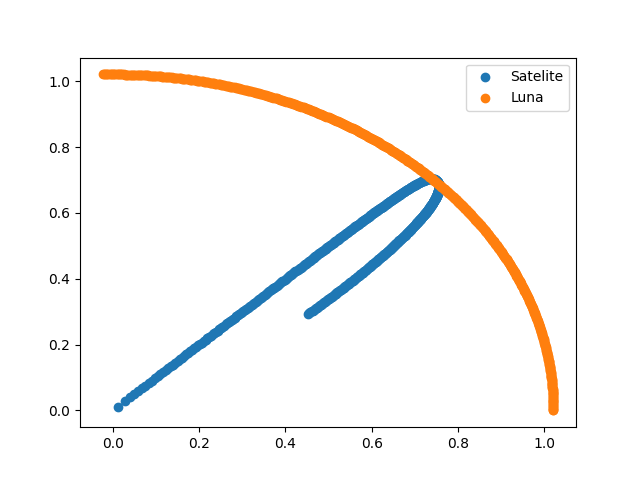

In [12]:
plt.scatter(x,y,label='Satelite')
plt.scatter(xluna,yluna,label='Luna')
plt.legend()
plt.show()

In [13]:
def update(frame):
    plt.clf()  # Clear the previous frame
    plt.plot(x[:frame], y[:frame], label='Satellite')
    plt.plot(xluna[:frame], yluna[:frame], label='Moon')
    plt.scatter(x[frame], y[frame], color='red')  # Highlight the current satellite position
    plt.scatter(xluna[frame], yluna[frame], color='blue')  # Highlight the current moon position
    plt.legend()
    plt.title('Satellite and Moon Motion')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')

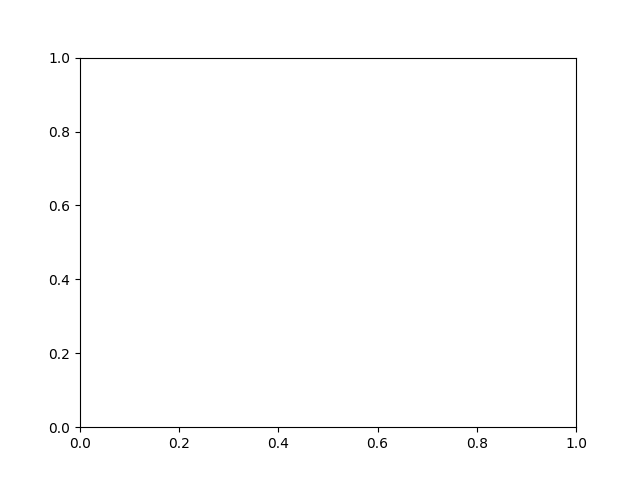

In [14]:
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()

# Set up the animation
animation = FuncAnimation(fig, update, frames=len(x), interval=50, repeat=False)

plt.show()